In [ ]:
from fastai.vision.all import *

Using fastai tutorial : https://docs.fast.ai/tutorial.vision.html 

In [ ]:
path =  untar_data(URLs.PETS)

In [ ]:
path.ls()

(#3) [Path('C:/Users/scastaneda/.fastai/data/oxford-iiit-pet/annotations'),Path('C:/Users/scastaneda/.fastai/data/oxford-iiit-pet/images'),Path('C:/Users/scastaneda/.fastai/data/oxford-iiit-pet/models')]

In [ ]:
files = get_image_files(path/"images")
len(files)

7390

To know which photos are dogs/cats we need to know which files are labeled dog and cats (lowercase letter = dogs, uppercase = cats)

In [ ]:
files[0], files[6]

(Path('C:/Users/scastaneda/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 Path('C:/Users/scastaneda/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg'))

In [ ]:
def label_func(f) : return f[0].isupper()

^Easy label function

In [ ]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms = Resize(224))

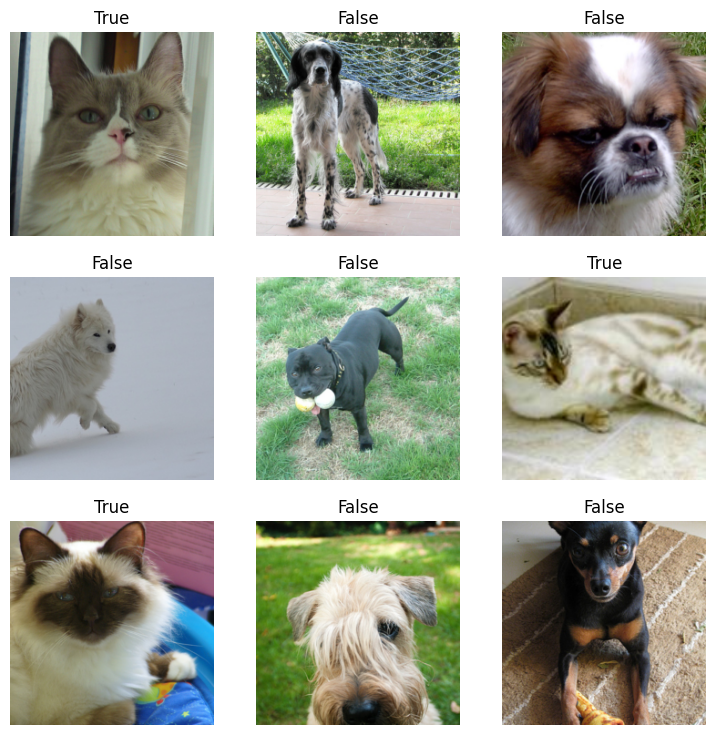

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(1)

In [ ]:
learn.predict(files[0])

('True', tensor(1), tensor([2.9783e-05, 9.9997e-01]))

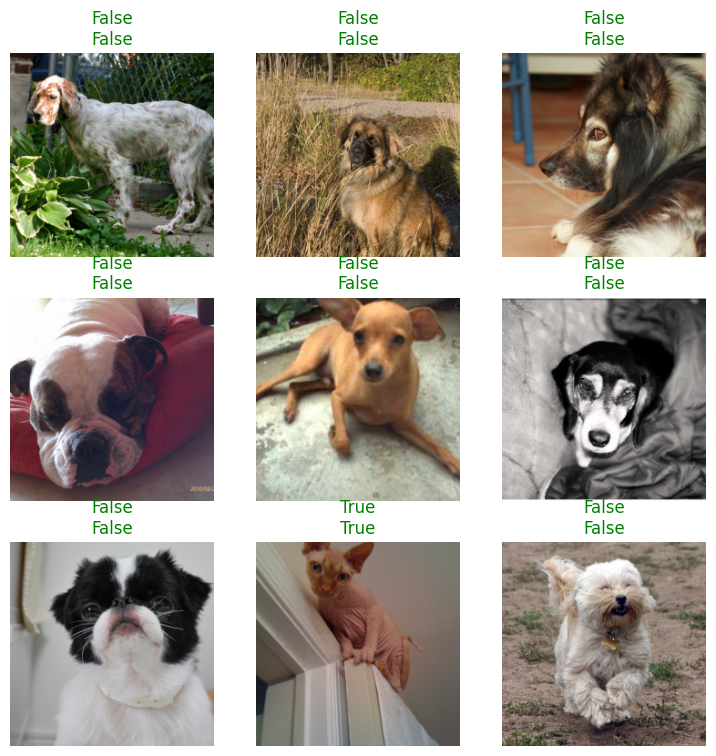

In [ ]:
learn.show_results()

In [ ]:
files[0].name

'Abyssinian_1.jpg'

To see breed name we need to see the actual file name which is ran above.

So everything we need is before the last _. To grab the name we run the expression:

In [ ]:
pat = r'^(.*)_\d+.jpg'

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

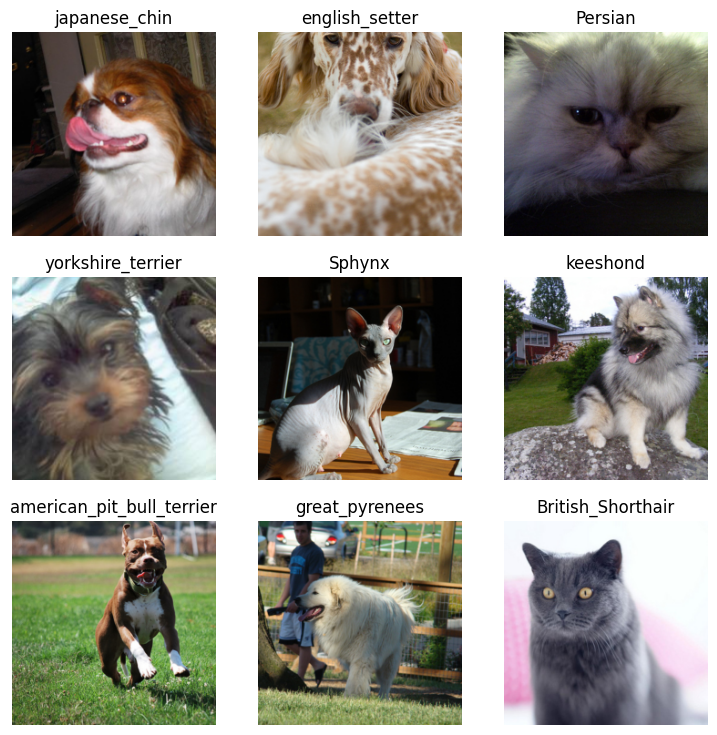

In [ ]:
dls.show_batch()

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
  batch_tfms=aug_transforms(size=224))

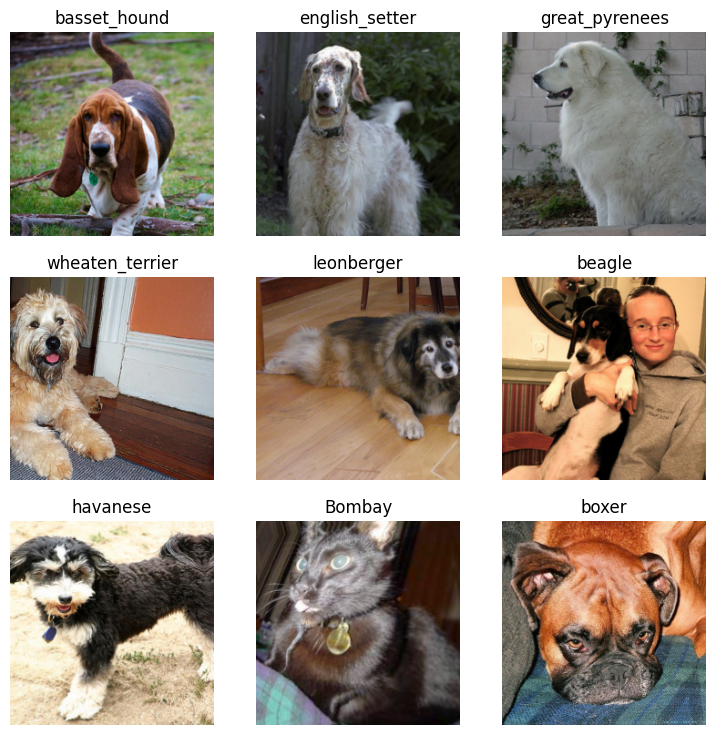

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Make the Learner

SuggestedLRs(valley=0.0012022644514217973)

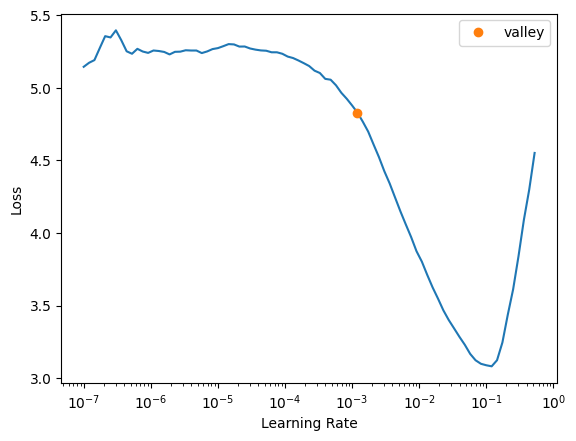

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(2, 3e-3)

This is fine tuning the learning rate

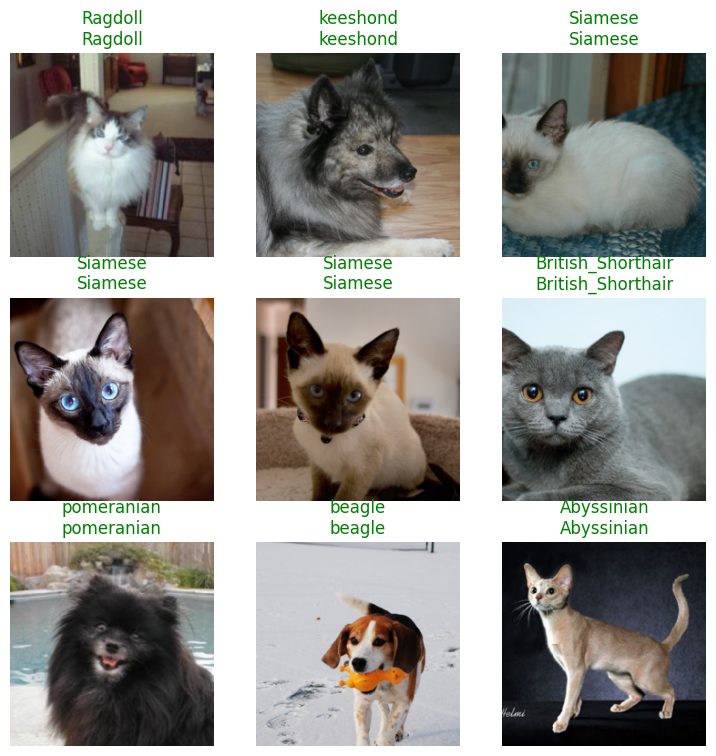

In [25]:
learn.show_results()

In [26]:
interp = Interpretation.from_learner(learn)

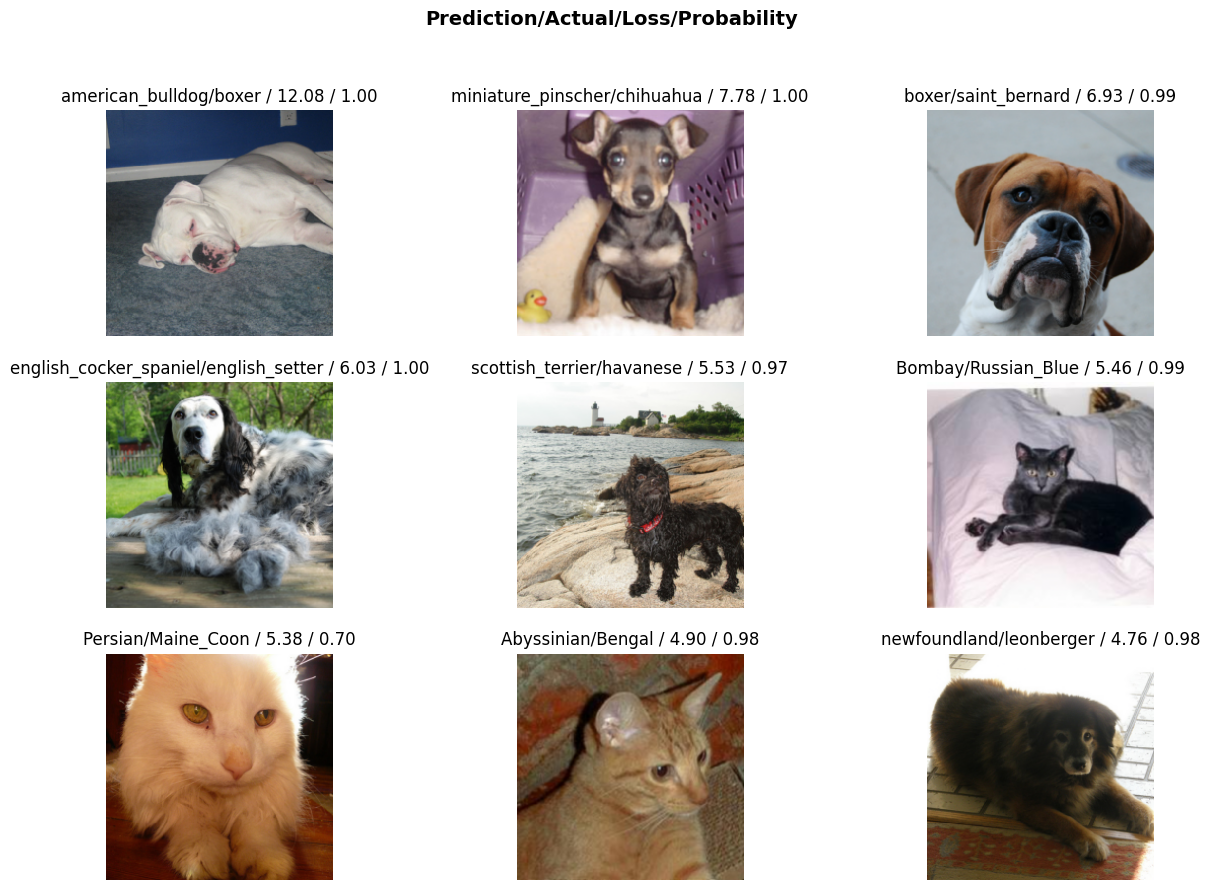

In [27]:
interp.plot_top_losses(9, figsize = (15,10))